# Plotting cell transitions

In this example, we will showcase how to use {func}`moscot.plotting.cell_transition` using the {func}`~moscot.datasets.hspc` dataset.

## Imports and data loading

In [1]:
from moscot import datasets
from moscot.problems.time import TemporalProblem
import moscot.plotting

In [2]:
adata = datasets.hspc()
adata

AnnData object with n_obs × n_vars = 4000 × 2000
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'neighbors_atac', 'pca', 'umap'
    obsm: 'X_lsi', 'X_pca', 'X_umap_ATAC', 'X_umap_GEX', 'peaks_tfidf'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_atac_connectivities', 'neighbors_atac_distances'

First, we need to prepare and solve the problem. Here, we set the ``threshold`` parameter to a relatively high value to speed up convergence at the cost of lower quality solution.

In [3]:
tp = TemporalProblem(adata).prepare(time_key="day").solve(epsilon=1e-2, threshold=1e-2)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(766, 1235)].                                   
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1235, 1201)].                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1201, 798)].                                   


As for all plotting functionalities in {mod}`moscot`, we first call the {meth}`~moscot.problems.time.TemporalProblem.cell_transition` method of the problem class, which stores the results of the computation in the {class}`~anndata.AnnData` instance. Let us assume we want to plot the cell transition between time point $4$ and time point $7$. Moreover, we want the rows and columns of our transition matrix to represent cell types. In general, we can aggregate by any categorical column in {attr}`anndata.AnnData.obs` via the ``source_groups`` parameter and the ``target_groups`` parameter, respectively. Moreover, we are interested in
descendants as opposed to ancestors, which is why we choose ``forward = True``.

In [4]:
cell_transition = tp.cell_transition(
    source=4, target=7, source_groups="cell_type", target_groups="cell_type", forward=True
)

``cell_transition`` is a data frame containing all the information needed, we now want to nicely visualize the result with {func}`moscot.plotting.cell_transition`. Therefore, we can either pass the {class}`~anndata.AnnData` instance or the problem instance. Depending on the size of our transition matrix, we might want to adapt the
``dpi`` and the ``fontsize`` parameters. If we don't want to plot the values of the transition, e.g., because the transition matrix is very large, we can simply set the ``annotation = False``.

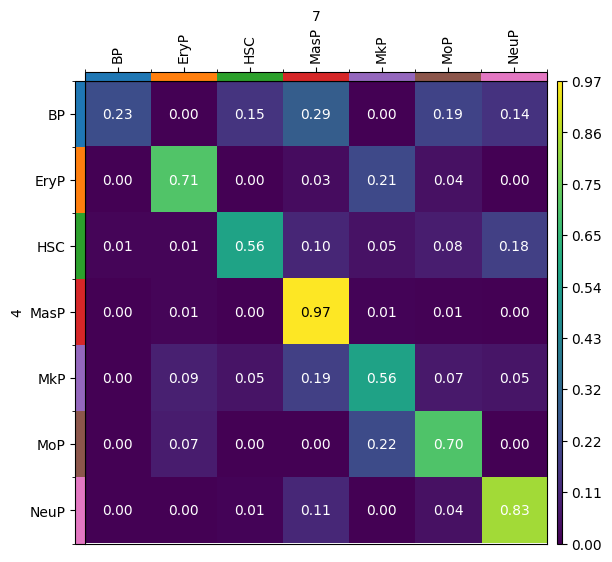

In [5]:
moscot.plotting.cell_transition(tp, dpi=100, fontsize=10)

By default, the result of the {func}`moscot.plotting.cell_transition` method of a problem instance is saved {attr}`anndata.AnnData.uns` ``['moscot_results']['cell_transition']['cell_transition']`` and overrides this element every time the method is called. To prevent this, we can specify the parameter ``key_added``, which we will do to store the results of the following use case.

We can also visualize transitions of only a subset of categories of an {attr}`anndata.AnnData.obs` column by passing a dictionary for ``source_groups`` or ``target_groups``. Moreover, passing a dictionary also allows to specify the order of the `source_groups` and `target_groups`, respectively.

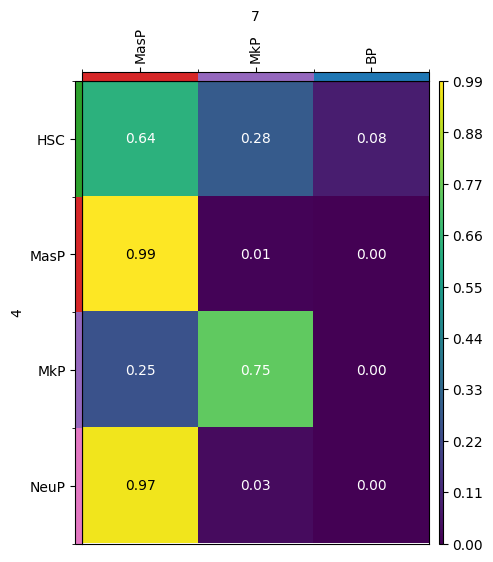

In [6]:
new_key = "subset_cell_transition"
tp.cell_transition(
    source=4,
    target=7,
    source_groups={"cell_type": ["HSC", "MasP", "MkP", "NeuP"]},
    target_groups={"cell_type": ["MasP", "MkP", "BP"]},
    forward=True,
    key_added=new_key,
)
moscot.plotting.cell_transition(tp, dpi=100, fontsize=10, uns_key=new_key)